
Ao lado dos campos: Nome, Plataforma, Ano de Lançamento, Gênero, Editora, Vendas NA , Vendas da UE , Vendas JP , Outras Vendas, Vendas Globais, temos:-

Critic_score - Pontuação agregada compilada pela equipe do Metacritic

Contagem de críticos - O número de críticos usados para criar a pontuação da crítica

User_score - Pontuação dos assinantes do Metacritic

Contagem de usuários - Número de usuários que deram a pontuação do usuário

Publisher - Parte responsável pela publicação do jogo

Classificação - As classificações ESRB | E=Todos os públicos - E10+ = Maiores de 10 anos | T = Acima de 13 anos |  M = Acima de 17 anos | AO = Adultos | RP = Não foi rotulado

Reconhecimentos

Este repositório, https://github.com/wtamu-cisresearch/scraper , após alguns ajustes funcionou extremamente bem!

## **Importando os dados:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


**Verificando se há dados nulos:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


**Neste caso específico vamos retirar os dados nulos, pois alguns representam mais de 50% das amostras, não irão servir paa fazer a previsão se os aods nulos forem substituídos.**

In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


**Retirando a coluna "Developer", pois é semelhante a "Publisher".**

In [7]:
df.drop(columns="Developer", inplace=True)

**Verificando se há duplicatas...**

In [8]:
df.duplicated().sum()

0

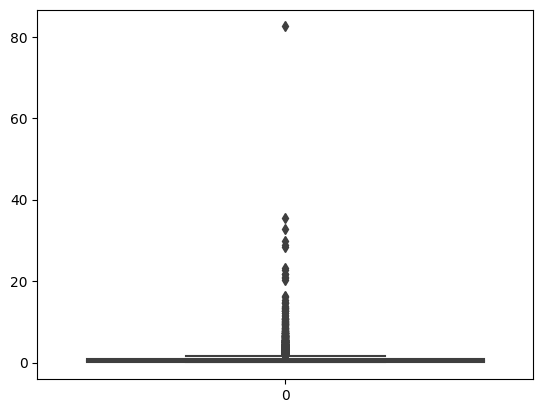

In [9]:
sns.boxplot(df["Global_Sales"]);

**Vamos retirar algumas outliers, apenas 2 amostras:**

In [10]:
lista = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i in df[lista]:
  df = df[df[i] < 40]

In [11]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,T


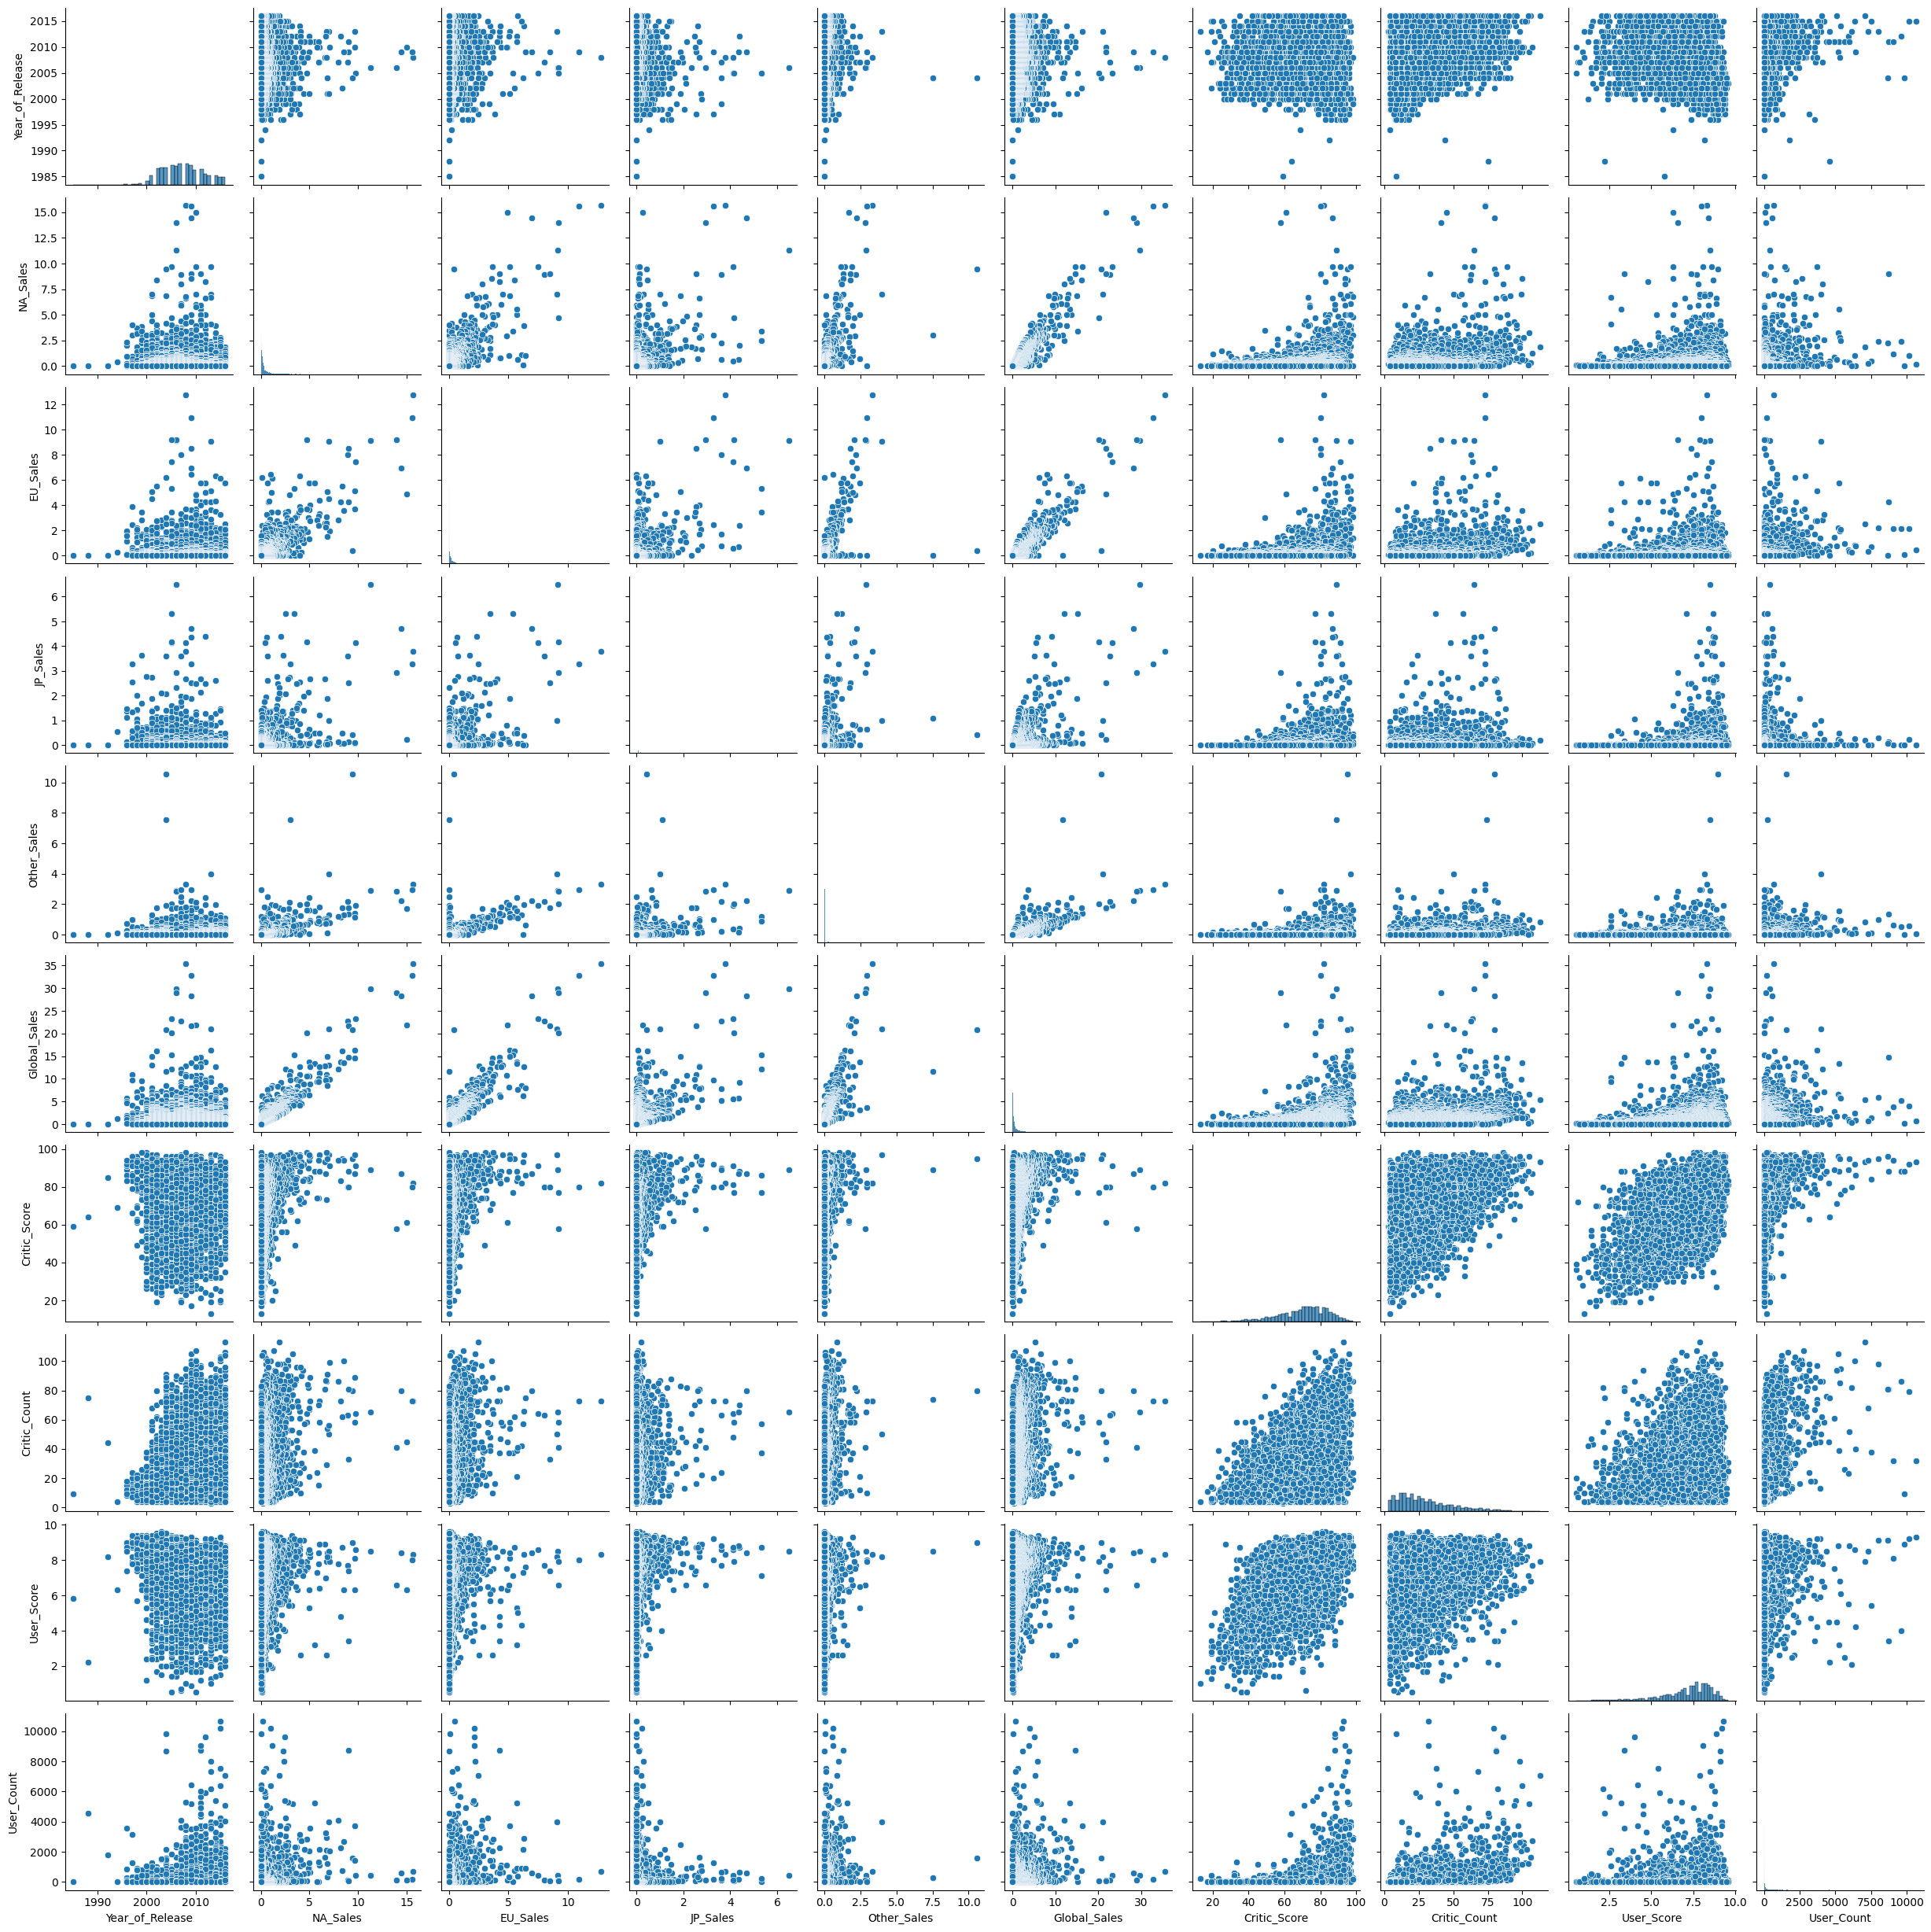

In [12]:
sns.pairplot(df);

**Analisando algumas correlações entre as variáveis.**

In [13]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.016447,0.050356,-0.038268,0.047326,0.010123,-0.007640,0.203415,-0.253894,0.199363
NA_Sales,-0.016447,1.000000,0.786440,0.458244,0.671424,0.940452,0.269069,0.322411,0.095841,0.284947
EU_Sales,0.050356,0.786440,1.000000,0.517596,0.658441,0.918541,0.244124,0.299955,0.060809,0.326893
JP_Sales,-0.038268,0.458244,0.517596,1.000000,0.367288,0.627023,0.148352,0.168207,0.128024,0.073196
Other_Sales,0.047326,0.671424,0.658441,0.367288,1.000000,0.768036,0.204595,0.252804,0.058814,0.257797
Global_Sales,0.010123,0.940452,0.918541,0.627023,0.768036,1.000000,0.272142,0.328160,0.098302,0.304080
Critic_Score,-0.007640,0.269069,0.244124,0.148352,0.204595,0.272142,1.000000,0.396452,0.580305,0.265628
Critic_Count,0.203415,0.322411,0.299955,0.168207,0.252804,0.328160,0.396452,1.000000,0.195016,0.365597
User_Score,-0.253894,0.095841,0.060809,0.128024,0.058814,0.098302,0.580305,0.195016,1.000000,0.017526
User_Count,0.199363,0.284947,0.326893,0.073196,0.257797,0.304080,0.265628,0.365597,0.017526,1.000000


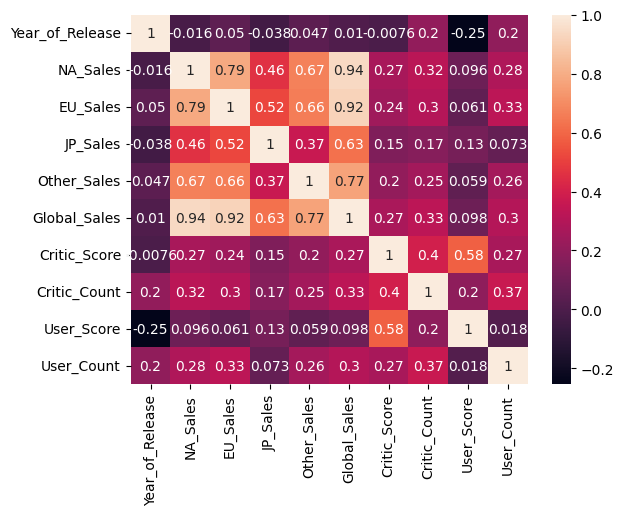

In [14]:
sns.heatmap(df.corr(), annot=True);

**Uma rápida análise estatística.**

In [15]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,2007.436987,0.388480,0.231880,0.063615,0.081451,0.765610,70.271249,28.927902,7.185507,174.700762
std,4.211521,0.830649,0.592917,0.284069,0.250157,1.695872,13.869415,19.223717,1.440013,587.468878
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.500000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,88.250000
max,2016.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.600000,10665.000000


# **Tratamento dos dados para implementação nos modelos**

In [16]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,T


**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [17]:
lista_oe = ["Name", "Platform", "Genre", "Publisher", "Rating"] 

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df[[i]])

  df[i]= oe.transform(df[[i]])

**Verificando a transformação. Perceba que as 5 variáveis (colunas) que tinham dados categóricos passaram para numéricos.**

In [18]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,2087.0,12.0,2008.0,6.0,160.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,1.0
3,4216.0,12.0,2009.0,10.0,160.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,1.0
6,2567.0,2.0,2006.0,4.0,160.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,1.0
7,4213.0,12.0,2006.0,3.0,160.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,1.0
8,2570.0,12.0,2009.0,4.0,160.0,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,1.0


**Agora vamos escalonar todos os dados para ficarem com dimensões próximas.**

In [19]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [20]:
ssc = StandardScaler()

ssc.fit(df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']])
h= ssc.transform(df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']])
df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']] = h

**Dados escalonados**

# **SVR**

**Chamando o KNN...**

In [21]:
from sklearn.svm import SVR

In [22]:
svr = SVR()

**Fazendo a grade de parâmetros do KNN**

In [23]:
param_grid_svr = {"kernel" : ["linear", "poly", "rbf", "sigmoid"],
                 "C" : [0.25, 1, 0.75],
                 "degree" : [2, 3, 5]}

**Vamos jogar para 10 splits**

In [24]:
splitter = KFold(n_splits=10, random_state=42, shuffle=True)

**Separando os dados de treino com os dados de teste.**

In [25]:
X = df.drop(columns=["Global_Sales"])
y = df["Global_Sales"]

# Dividindo em dados de teste e dados de treino, peguei 50% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

**Motando a grade geral dos parâmetros com o GridSearch**

In [26]:
model_svr = GridSearchCV(estimator=svr,
                       param_grid=param_grid_svr ,
                       scoring="r2", 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

model_svr.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.25, 1, 0.75], 'degree': [2, 3, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=10)

In [27]:
model_svr.best_params_

{'C': 0.25, 'degree': 2, 'kernel': 'linear'}

**Overfitou os dados de treino no KNN, vamos seguir com outros estimadores para ver se conseguimos melhoras.**

In [28]:
# Predições de treino
y_pred_train_svr = model_svr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_svr):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_svr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_svr)):.2f}")

# Predições de teste
y_pred_test_svr = model_svr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_svr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_svr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_svr)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.03
RMSE: 0.04

Métricas de teste:

R^2: 1.00
MAE: 0.03
RMSE: 0.04


In [ ]:
model_svr.best_params_

{'C': 0.25, 'degree': 2, 'kernel': 'linear'}

In [ ]:
tabela_svr = pd.DataFrame()

In [ ]:
tabela_svr["Amostra existente"] = y_test

In [ ]:
tabela_svr["Predição"] = y_pred_test_svr

In [ ]:
tabela_svr["porcentagem de acerto %"]= (y_test/y_pred_test_svr)*100

In [ ]:
lista_num = []
for c in tabela_svr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_svr["porcentagem de acerto %"]= lista_num

In [ ]:
tabela_svr

,Amostra existente,Predição,porcentagem de acerto %
2133,0.97,0.952838,98.198907
254,4.36,4.365640,99.870806
710,2.25,2.288800,98.304795
3718,0.54,0.507991,93.698804
9954,0.12,0.074653,39.256734
...,...,...,...
6852,0.24,0.235083,97.908435
1348,1.42,1.435653,98.909666
2845,0.72,0.751254,95.839756
9199,0.14,0.164760,84.971850


Salvando a tabela

In [ ]:
tabela_svr.to_csv("08-svr_tabela_comparação.csv")

Salvando o estimador...

In [ ]:
import joblib

In [ ]:
joblib.dump(model_svr, 'svr_modelo.pkl')

['svr_modelo.pkl']

In [ ]:
svr_modelo = joblib.load('svr_modelo.pkl')

#**XGBoost Regressor**

**Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:**

In [29]:
X = df.drop(columns=["Global_Sales"])
y = df["Global_Sales"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

**Chamando o XGBoost Regressor...**

In [30]:
xgbr = XGBRegressor(eval_metric='logloss', random_state=42)

**Fazendo a grade de parâmetros do XGBoost Regressor**

In [32]:
params_grid_xgbr = {"n_estimators": [500, 1000, 2500],
                   "max_depth": [2, 3, 5],
                   "learning_rate": [0.01]} 


**Vamos jogar para 5 splits**

In [33]:
splitter = KFold(n_splits=5, random_state=42, shuffle=True)

**Motando a grade geral dos parâmetros com o GridSearch**

In [34]:
model_xgbr = GridSearchCV(estimator=xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="r2", 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

model_xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='logloss', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [2, 3, 5],
                         'n_estimators': [500, 1000, 2500]},
             scoring='r2', verbose=10)

**Vamos comparar as métricas de treino com as medições de teste.**

**Nem sempre um overfit significa que algo deu errado, em banco de dados onde não há ruídos (outliers) um overfit mostra que o modelo aprendeu bem, uma prova é a tabela comparativa abaixo.**

In [35]:
y_pred_train = model_xgbr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")


y_pred_test = model_xgbr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.02
RMSE: 0.04

Métricas de teste:

R^2: 0.99
MAE: 0.03
RMSE: 0.15


In [36]:
model_xgbr.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 2500}

Tabela de forma decrescente com as melhores métricas.

In [37]:
xgbr_results = pd.DataFrame(model_xgbr.cv_results_)
xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,7.736109,0.772121,0.029876,0.000588,0.01,2,2500,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.989926,0.973220,0.996087,0.994670,0.972494,0.985279,0.010349,1
5,11.414626,0.380700,0.055304,0.019167,0.01,3,2500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.994797,0.967373,0.994716,0.994581,0.969247,0.984143,0.012941,2
4,4.431102,0.725937,0.020970,0.001360,0.01,3,1000,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.993612,0.966313,0.993250,0.993398,0.968408,0.982996,0.012784,3
1,3.521572,0.686136,0.018794,0.006593,0.01,2,1000,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.986940,0.972094,0.991749,0.993326,0.970167,0.982855,0.009820,4
8,18.221103,2.445062,0.091499,0.003730,0.01,5,2500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.987699,0.977682,0.989862,0.993684,0.955857,0.980957,0.013620,5
7,7.848006,0.630852,0.034825,0.001419,0.01,5,1000,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.987254,0.977116,0.989283,0.993515,0.954989,0.980431,0.013816,6
3,2.653737,0.598412,0.014849,0.003380,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.991188,0.953750,0.986519,0.991031,0.960247,0.976547,0.016180,7
6,3.805683,0.666312,0.023017,0.007863,0.01,5,500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.986588,0.964968,0.986208,0.992711,0.948678,0.975831,0.016515,8
0,1.443327,0.035634,0.011930,0.002093,0.01,2,500,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.980635,0.955857,0.983162,0.989661,0.958901,0.973643,0.013636,9


**Salvando o estimador...**

In [38]:
import joblib

In [39]:
joblib.dump(model_xgbr, 'xgbr_modelo.pkl')

['xgbr_modelo.pkl']

In [ ]:
xgbr_modelo = joblib.load('xgbr_modelo.pkl')

**Vamos agora fazer uma breve comparação entre os dados originais e os preditos.**

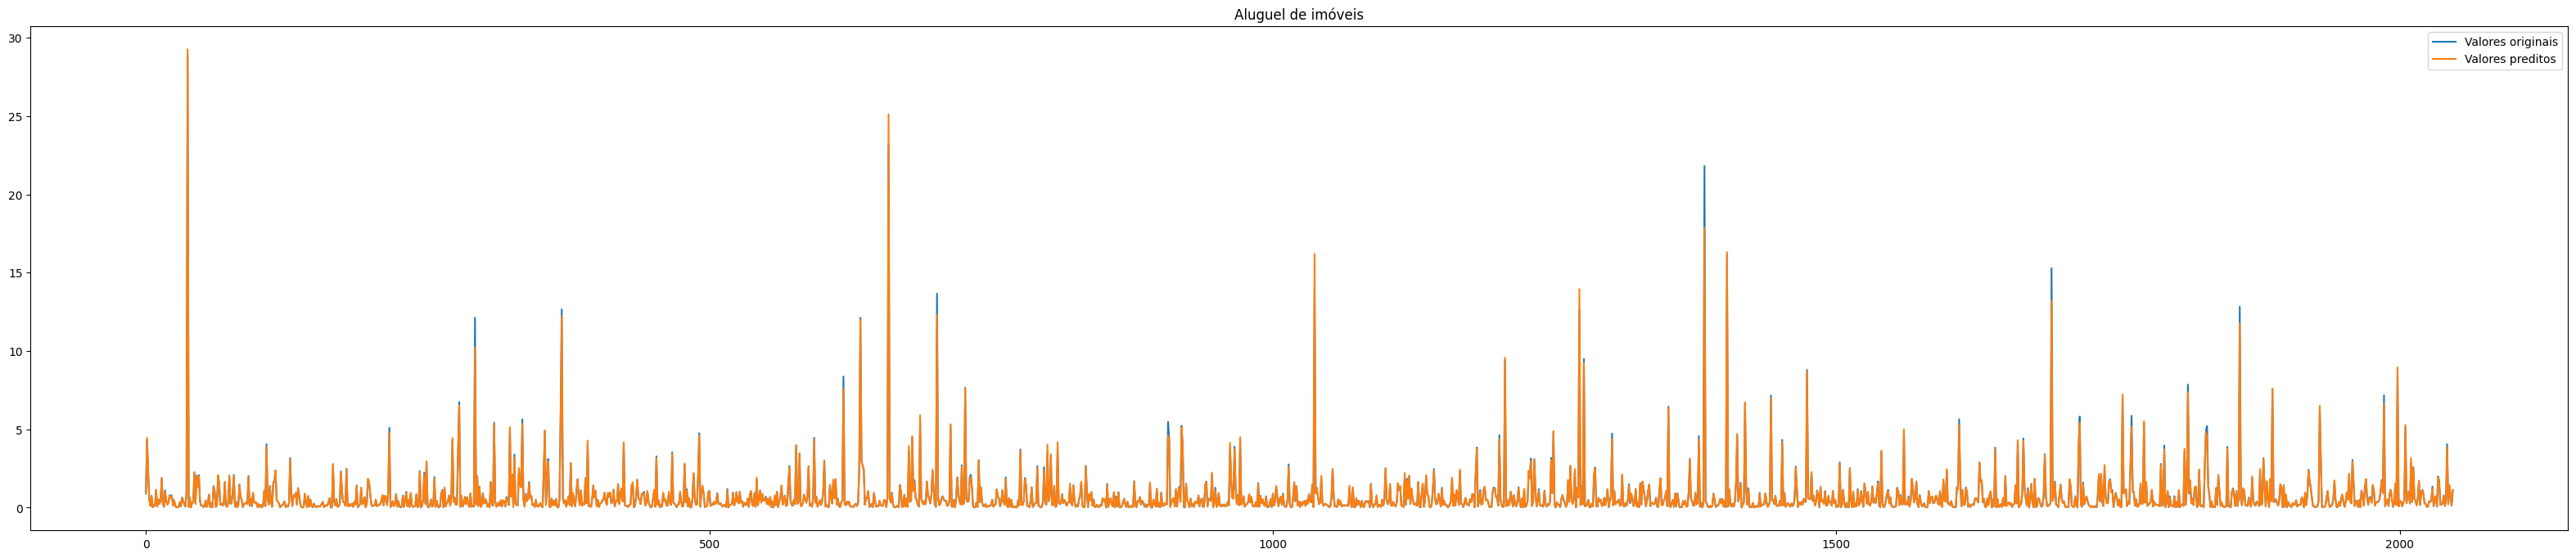

In [40]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores originais")
plt.plot(x_ax, y_pred_test, label="Valores preditos")
plt.title("Aluguel de imóveis")
plt.legend()
plt.show();

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [41]:
tabela_xgbr = pd.DataFrame()

In [42]:
tabela_xgbr["valores reais"] = y_test

In [43]:
tabela_xgbr["valores preditos"] = y_pred_test

In [44]:
tabela_xgbr["porcentagem de acerto %"]= (y_test/y_pred_test)*100

In [45]:
lista_num = []
for c in tabela_xgbr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_xgbr["porcentagem de acerto %"]= lista_num

**Tabela comparativa**

In [46]:
tabela_xgbr

,valores reais,valores preditos,porcentagem de acerto %
2133,0.97,0.890056,91.018051
254,4.36,4.449948,97.978666
710,2.25,2.184092,96.982375
3718,0.54,0.484210,88.478129
9954,0.12,0.104210,84.847859
...,...,...,...
6852,0.24,0.222772,92.266606
1348,1.42,1.434652,98.978734
2845,0.72,0.781182,92.168037
9199,0.14,0.144121,97.140884


In [48]:
tabela_xgbr.to_csv("08-resultados_tabela_xgbr.csv")

# **Otimização Bayesiana**

**Utiliza o processo gaussiano. Vamos utlizar para tentar melhorar a acurácia**.



---



---



---



In [49]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,-0.100574,0.795526,0.133694,0.237397,0.347096,18.410480,21.131194,13.118840,12.827104,35.52,0.845718,2.292758,0.774003,0.909560,-1.189983
3,1.591470,0.795526,0.371155,1.286957,0.347096,18.326202,18.044531,11.323371,11.467855,32.77,0.701505,2.292758,0.565656,0.029449,-1.189983
6,0.280911,-1.536076,-0.341229,-0.287383,0.347096,13.113027,15.025336,22.659470,11.188010,29.80,1.350462,1.876575,0.912901,0.436309,-1.189983
7,1.589086,0.795526,-0.341229,-0.549773,0.347096,16.339657,15.092804,10.091187,11.028098,28.92,-0.884835,0.628025,-0.406628,-0.077798,-1.189983
8,0.283295,0.795526,0.371155,-0.287383,0.347096,16.917561,11.314593,16.322521,8.629425,28.32,1.206250,2.656918,0.843452,0.713791,-1.189983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,-0.926329,-1.302915,-1.528536,-1.336944,0.322695,-0.455678,-0.391112,-0.223959,-0.325623,0.01,-1.750112,-1.296821,-3.323481,-0.261651,-1.189983
16677,0.066326,-1.302915,-1.291074,-0.812163,0.176290,-0.455678,-0.391112,-0.223959,-0.325623,0.01,0.773611,-0.880638,1.121247,-0.282079,0.233075
16696,-0.015535,-0.836595,1.558462,-1.336944,-0.104321,-0.467717,-0.374245,-0.223959,-0.325623,0.01,0.701505,-0.464455,0.287861,0.403965,0.233075
16700,-1.435771,-0.836595,0.846078,0.762177,-0.958352,-0.455678,-0.391112,-0.223959,-0.325623,0.01,-0.668516,-0.880638,-0.962219,-0.224200,1.181780


In [50]:
X = df.drop(columns="Global_Sales")
y = df["Global_Sales"]

X_train_ob, X_test_ob, y_train_ob, y_test_ob = train_test_split(X, y, test_size=0.3, random_state=13)

In [ ]:
!pip install hyperopt
from six.moves import collections_abc
from hyperopt import hp, tpe, fmin, Trials, space_eval

**Vamos utilizar os mesmo parâmetros do XGBoost, já que até agora foi a que deu melhor acurácia.**

In [53]:
hps_space = {"n_estimators" : hp.choice("n_estimators",  range(500, 2500)),  
             "max_depth" : hp.choice("max_depth", range(2, 11)),
             "learning_rate" : hp.choice("learning_rate", [0.001, 0.01])}

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
splitter = KFold(n_splits=5, random_state=42, shuffle=True)

In [56]:
def objective(hps_space):
    
    pipe =  XGBRegressor(**hps_space)
    # =============================================
    results = cross_validate(pipe,
                             X_train_ob, y_train_ob, 
                             cv=splitter,
                             scoring="r2",
                             n_jobs=-1)

    r2 = results["test_score"].mean()

    # como o valor vai ser minimizado, mas queremos MAXIMIZAR o r2, colocamos esse sinal negativo
    return -r2

In [57]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [06:22<00:00, 38.24s/trial, best loss: -0.978202876577115]


In [58]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1009}

In [59]:
xgbr_ob = XGBRegressor(**best_hps, use_label_encoder=False)

xgbr_ob.fit(X_train_ob, y_train_ob)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1009, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
y_pred_train_ob = xgbr_ob.predict(X_train_ob)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train_ob, y_pred_train_ob):.2f}")
print(f"MAE: {mean_absolute_error(y_train_ob, y_pred_train_ob):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_ob, y_pred_train_ob)):.2f}")


y_pred_test_ob = xgbr_ob.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test_ob, y_pred_test_ob):.2f}")
print(f"MAE: {mean_absolute_error(y_test_ob, y_pred_test_ob):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_ob, y_pred_test_ob)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.01
RMSE: 0.02

Métricas de teste:

R^2: 0.98
MAE: 0.04
RMSE: 0.20


In [71]:
tabela_xgbr_ob = pd.DataFrame()

In [68]:
y_test_ob.shape, y_pred_test_ob.shape

((2048,), (2048,))

In [72]:
tabela_xgbr_ob["Amostra existente"] = y_test_ob

In [73]:
tabela_xgbr_ob["Predição"] = y_pred_test_ob

In [75]:
tabela_xgbr_ob["porcentagem de acerto %"]= (y_test_ob/y_pred_test_ob)*100

In [76]:
lista_num = []
for c in tabela_xgbr_ob["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_xgbr_ob["porcentagem de acerto %"]= lista_num

In [77]:
tabela_xgbr_ob

,Amostra existente,Predição,porcentagem de acerto %
2133,0.97,0.947703,97.647220
254,4.36,4.458544,97.789766
710,2.25,2.368368,95.002132
3718,0.54,0.516891,95.529280
9954,0.12,0.103463,84.016259
...,...,...,...
6852,0.24,0.228612,95.018534
1348,1.42,1.457264,97.442851
2845,0.72,0.736698,97.733435
9199,0.14,0.159831,87.592379


Salvando a tabela

In [78]:
tabela_xgbr_ob.to_csv("08-resultados_tabela_xgbc_ob.csv")

Salvando o estimador...

In [ ]:
import joblib

In [79]:
joblib.dump(xgbr_ob, 'xgbc_modelo_ob.pkl')

['xgbc_modelo_ob.pkl']

In [ ]:
xgbc_modelo_ob = joblib.load('xgbc_modelo_ob.pkl')



---



---



---



#**Interpretando o modelo globalmente**

In [80]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,-0.100574,0.795526,0.133694,0.237397,0.347096,18.410480,21.131194,13.118840,12.827104,35.52,0.845718,2.292758,0.774003,0.909560,-1.189983
3,1.591470,0.795526,0.371155,1.286957,0.347096,18.326202,18.044531,11.323371,11.467855,32.77,0.701505,2.292758,0.565656,0.029449,-1.189983
6,0.280911,-1.536076,-0.341229,-0.287383,0.347096,13.113027,15.025336,22.659470,11.188010,29.80,1.350462,1.876575,0.912901,0.436309,-1.189983
7,1.589086,0.795526,-0.341229,-0.549773,0.347096,16.339657,15.092804,10.091187,11.028098,28.92,-0.884835,0.628025,-0.406628,-0.077798,-1.189983
8,0.283295,0.795526,0.371155,-0.287383,0.347096,16.917561,11.314593,16.322521,8.629425,28.32,1.206250,2.656918,0.843452,0.713791,-1.189983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,-0.926329,-1.302915,-1.528536,-1.336944,0.322695,-0.455678,-0.391112,-0.223959,-0.325623,0.01,-1.750112,-1.296821,-3.323481,-0.261651,-1.189983
16677,0.066326,-1.302915,-1.291074,-0.812163,0.176290,-0.455678,-0.391112,-0.223959,-0.325623,0.01,0.773611,-0.880638,1.121247,-0.282079,0.233075
16696,-0.015535,-0.836595,1.558462,-1.336944,-0.104321,-0.467717,-0.374245,-0.223959,-0.325623,0.01,0.701505,-0.464455,0.287861,0.403965,0.233075
16700,-1.435771,-0.836595,0.846078,0.762177,-0.958352,-0.455678,-0.391112,-0.223959,-0.325623,0.01,-0.668516,-0.880638,-0.962219,-0.224200,1.181780


Percebemos que as features que tem dados como números contínuos tem um maior impacto na interpretação do que as features com dados como números discretos e as features com os maiores valores pesam mais na saída final, se analisarmos no dataset veremos que os valores da feature 'rent amount' são maiores que 'hoa' e assim sucessivamente como vemos no gráfico final:

**SHAP**

In [ ]:
!pip install shap
import shap

**Separar em features e target...**

In [82]:
#Separando o que é features e target:
X = df.drop(columns="Global_Sales")
y = df["Global_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [83]:
xgbr = XGBRegressor().fit(X_train, y_train)

In [84]:
explainer = shap.TreeExplainer(xgbr)

In [85]:
shap_vals = explainer.shap_values(X_train)

**Temos abaixo as Features que mais impactaram na escolha dos valores preditivos para todos os dados:**

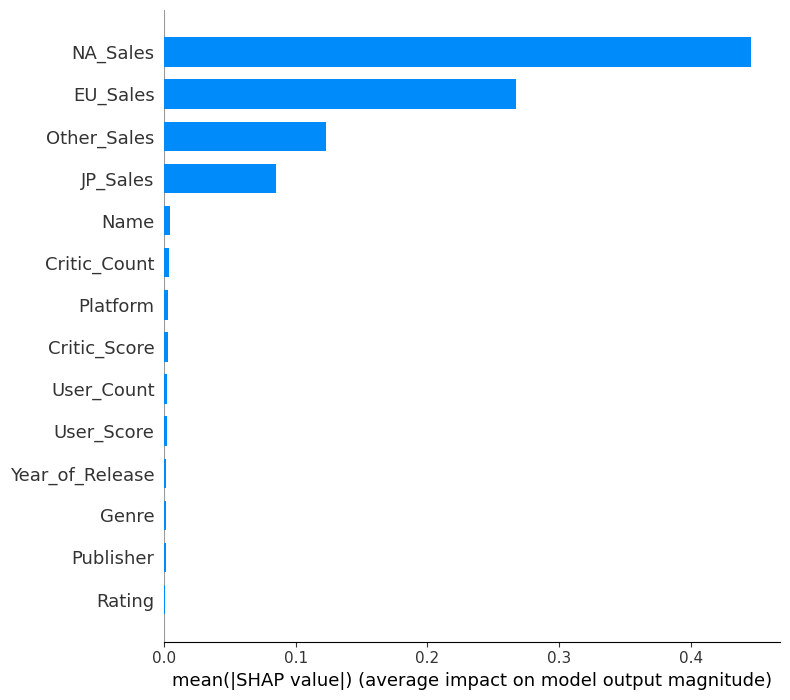

In [86]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

# **Rede Neural - Keras Regressor**

In [ ]:
!pip install scikeras

In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from tensorflow.keras import backend as k 
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,-0.100574,0.795526,0.133694,0.237397,0.347096,18.410480,21.131194,13.118840,12.827104,35.52,0.845718,2.292758,0.774003,0.909560,-1.189983
3,1.591470,0.795526,0.371155,1.286957,0.347096,18.326202,18.044531,11.323371,11.467855,32.77,0.701505,2.292758,0.565656,0.029449,-1.189983
6,0.280911,-1.536076,-0.341229,-0.287383,0.347096,13.113027,15.025336,22.659470,11.188010,29.80,1.350462,1.876575,0.912901,0.436309,-1.189983
7,1.589086,0.795526,-0.341229,-0.549773,0.347096,16.339657,15.092804,10.091187,11.028098,28.92,-0.884835,0.628025,-0.406628,-0.077798,-1.189983
8,0.283295,0.795526,0.371155,-0.287383,0.347096,16.917561,11.314593,16.322521,8.629425,28.32,1.206250,2.656918,0.843452,0.713791,-1.189983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,-0.926329,-1.302915,-1.528536,-1.336944,0.322695,-0.455678,-0.391112,-0.223959,-0.325623,0.01,-1.750112,-1.296821,-3.323481,-0.261651,-1.189983
16677,0.066326,-1.302915,-1.291074,-0.812163,0.176290,-0.455678,-0.391112,-0.223959,-0.325623,0.01,0.773611,-0.880638,1.121247,-0.282079,0.233075
16696,-0.015535,-0.836595,1.558462,-1.336944,-0.104321,-0.467717,-0.374245,-0.223959,-0.325623,0.01,0.701505,-0.464455,0.287861,0.403965,0.233075
16700,-1.435771,-0.836595,0.846078,0.762177,-0.958352,-0.455678,-0.391112,-0.223959,-0.325623,0.01,-0.668516,-0.880638,-0.962219,-0.224200,1.181780


**Vamos ao Keras...**

In [117]:
X = df.drop(columns=["Global_Sales"])
y = df["Global_Sales"]

#====================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#====================================================================================================
def criarRede(optimizer='rmsprop', init='glorot_uniform'):
    #k.clear_session()
    rn = Sequential([
                #1ª camada oculta
               tf.keras.layers.Dense(units=8, activation = "relu", kernel_initializer = "random_uniform", input_dim=X_train.shape[1]), # input_dim = nº de colunas
               tf.keras.layers.Dropout(0.2),
                #2ª camada oculta
               tf.keras.layers.Dense(units=8, activation = "relu", kernel_initializer = "random_uniform"),
               tf.keras.layers.Dropout(0.2),
               #Camada de saída
               tf.keras.layers.Dense(units= 1, activation = 'linear')])
    

    rn.compile(optimizer = optimizer, loss = "mean_absolute_error", metrics = ['mean_absolute_error'])


    return rn
#====================================================================================================
kr = KerasRegressor(model=criarRede)

pipe = Pipeline([('kr', kr)])

# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = KFold(n_splits=5, random_state=42, shuffle=True)

# Opitmização de Hiperparêmetros
params = {"kr__optimizer": ["adam"],
          "kr__batch_size": [20],
          "kr__epochs":[1000]} 
#====================================================================================================
#Motando a grade geral de parâmetros.
grid_kr = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring="neg_mean_absolute_error",
                       cv=splitter,
                       verbose=10)

grid_kr.fit(X_train, y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 504/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.1890 - mean_absolute_error: 0.1890
Epoch 505/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.1679 - mean_absolute_error: 0.1679
Epoch 506/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.1886 - mean_absolute_error: 0.1886
Epoch 507/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.1735 - mean_absolute_error: 0.1735
Epoch 508/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.1736 - mean_absolute_error: 0.1736
Epoch 509/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.1746 - mean_absolute_error: 0.1746
Epoch 510/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.1679 - mean_absolute_error: 0.1679
Epoch 511/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.1813 - mean_absolute_error: 0.1813
Epoch 512/1000
219/21

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('kr',
                                        KerasRegressor(model=<function criarRede at 0x7f956ad3bbe0>))]),
             param_grid={'kr__batch_size': [20], 'kr__epochs': [1000],
                         'kr__optimizer': ['adam']},
             scoring='neg_mean_absolute_error', verbose=10)

In [118]:
grid_kr.best_params_

{'kr__batch_size': 20, 'kr__epochs': 1000, 'kr__optimizer': 'adam'}

In [119]:
grid_kr.best_score_

-0.1315714947113556

In [120]:
y_pred_keras = grid_kr.predict(X_test)

69/69 [==============================] - 0s 1ms/step


In [121]:
y_pred_keras

array([3.974441  , 0.32842693, 0.22311172, ..., 0.20571417, 0.08484232,
       0.67140293], dtype=float32)

In [122]:
tabela_keras = pd.DataFrame()

In [123]:
tabela_keras["Valor real"] = y_test

In [124]:
tabela_keras["Valor preditivo"] = y_pred_keras

In [125]:
tabela_keras["porcentagem de acerto %"]= (y_test/y_pred_keras)*100

In [126]:
lista_num = []
for c in tabela_keras["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_keras["porcentagem de acerto %"]= lista_num

In [127]:
tabela_keras = tabela_keras.sort_index()
tabela_keras = tabela_keras.reset_index()
tabela_keras

,index,Valor real,Valor preditivo,porcentagem de acerto %
0,15,21.79,14.353572,48.191097
1,26,15.29,10.080027,48.313893
2,28,14.98,9.865442,48.156833
3,32,14.61,9.638658,48.422875
4,35,13.67,9.022619,48.491889
...,...,...,...,...
1360,16617,0.01,0.079100,12.642192
1361,16631,0.01,0.073973,13.518476
1362,16656,0.01,0.074063,13.501988
1363,16667,0.01,0.075035,13.327121


In [128]:
tabela_keras.to_csv("08-resultados_tabela_keras.csv")

In [129]:
lista = []
for c in range(tabela_keras.shape[0]):
  if tabela_keras.loc[[c]].values[0][2] < tabela_keras.loc[[c]].values[0][1]:
      valor = (tabela_keras.loc[[c]].values[0][2] / tabela_keras.loc[[c]].values[0][1])*100
      lista.append(valor)
  elif tabela_keras.loc[[c]].values[0][2] > tabela_keras.loc[[c]].values[0][1]:
      valor = (tabela_keras.loc[[c]].values[0][1] / tabela_keras.loc[[c]].values[0][2])*100
      lista.append(valor)
media = np.mean(lista)
print(f"Teve uma média de acerto de {media:.2f}%")

Teve uma média de acerto de 73.18%


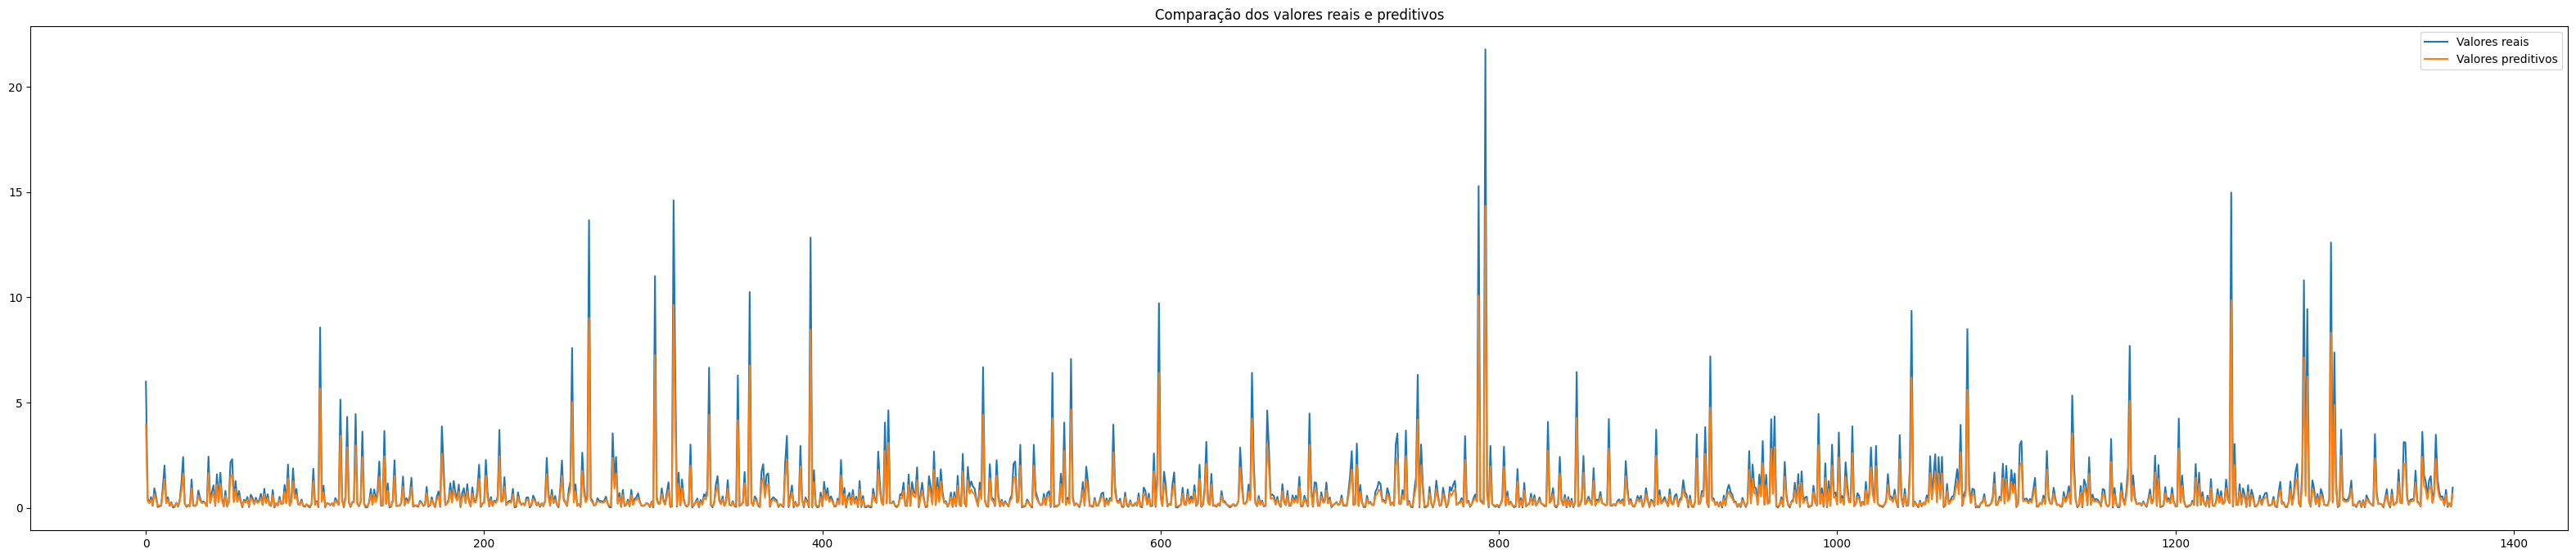

In [130]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores reais")
plt.plot(x_ax, y_pred_keras, label="Valores preditivos")
plt.title("Comparação dos valores reais e preditivos")
plt.legend()
plt.show();

In [ ]:
import joblib

In [131]:
joblib.dump(grid_kr, 'keras_modelo.pkl')

['keras_modelo.pkl']

In [ ]:
keras_modelo = joblib.load('keras_modelo.pkl')